# Filter De Novo dataset
Aim: Select for ADME properties within compounds of the generated De Novo AI set

# Load Modules

In [2]:
try:
    from rdkit import Chem
    from rdkit.Chem import Descriptors, Draw, PandasTools
except:
    !pip install rdkit

from pathlib import Path
import math

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.patches as mpatches
from rdkit import Chem
from rdkit.Chem import Descriptors, Draw, PandasTools

  Using cached rdkit-2022.9.1-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (29.7 MB)


In [3]:
# Set path to this notebook
HERE = Path(_dh[-1])
DATA = HERE / "data"

In [5]:
# Load data
df = pd.read_table(DATA/"original_and_generated.tsv")

In [6]:
df = df[df['Group']=="Generated"][['SMILES']]

,SMILES,ROMol
1772,O=C(c1ccc(O)cc1)N1CCC(Cc2ccccc2)CC1,
1773,O=S(=O)(Nc1ccc(-c2nc3cc(NS(=O)(=O)c4ccccc4)ccc...,
1774,C=C(CCC)C1=CC2=C3C(=O)C(=O)C(=Cc4ccccc4)C2=C(O...,
1775,COC(=O)C1C(C)=NC(=O)NC1c1ccc(C)cc1,
1776,O=C(O)C(=O)Nc1ccc(OCc2c(F)cccc2Br)cc1,
...,...,...
2767,O=C(c1cccc(Cl)c1)N1CCCc2cc(C(O)CN3CCCCC3)ccc21,
2768,CC(=O)N1Cc2ccccc2C(C)(C)N1O,
2769,O=C(O)c1ccc(CN2C(=O)C(=Cc3cccc(Oc4ccccc4)c3)N2...,
2770,COC(=O)COC(=O)C(C)=CC(C)=Cc1csc(C(Cc2ccc(OCc3c...,

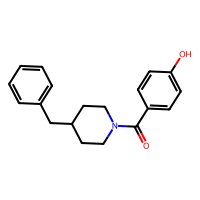
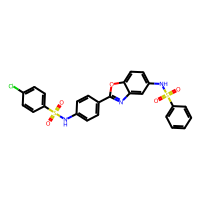
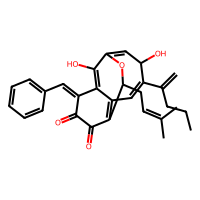
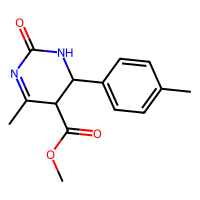
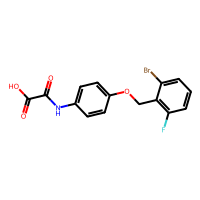
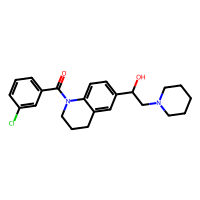
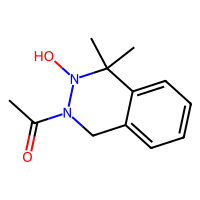
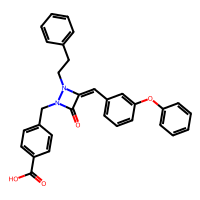
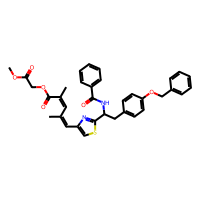
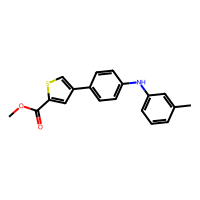

In [7]:
PandasTools.AddMoleculeColumnToFrame(df, "SMILES")
df

## Molecular properties

,SMILES,ROMol,molecular_weight,n_hba,n_hbd,logp
1772,O=C(c1ccc(O)cc1)N1CCC(Cc2ccccc2)CC1,,295.157229,2,1,3.48710
1773,O=S(=O)(Nc1ccc(-c2nc3cc(NS(=O)(=O)c4ccccc4)ccc...,,539.037640,6,2,5.74980
1774,C=C(CCC)C1=CC2=C3C(=O)C(=O)C(=Cc4ccccc4)C2=C(O...,,470.209324,5,2,5.62670
1775,COC(=O)C1C(C)=NC(=O)NC1c1ccc(C)cc1,,260.116092,3,1,2.00942
1776,O=C(O)C(=O)Nc1ccc(OCc2c(F)cccc2Br)cc1,,366.985548,3,2,3.19030
...,...,...,...,...,...,...
2767,O=C(c1cccc(Cl)c1)N1CCCc2cc(C(O)CN3CCCCC3)ccc21,,398.176106,3,1,4.45230
2768,CC(=O)N1Cc2ccccc2C(C)(C)N1O,,220.121178,3,1,1.89000
2769,O=C(O)c1ccc(CN2C(=O)C(=Cc3cccc(Oc4ccccc4)c3)N2...,,490.189257,4,1,6.02010
2770,COC(=O)COC(=O)C(C)=CC(C)=Cc1csc(C(Cc2ccc(OCc3c...,,610.213758,8,1,6.50170

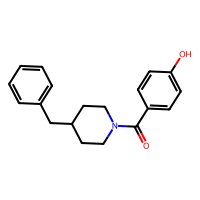
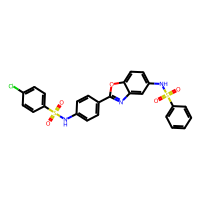
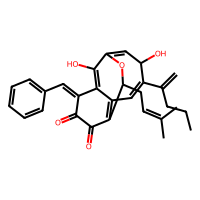
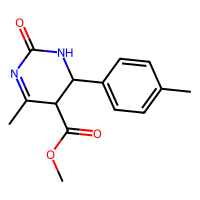
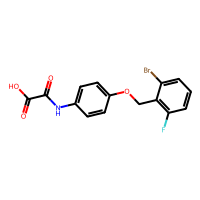
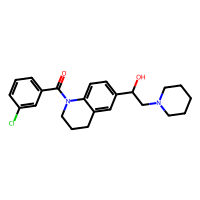
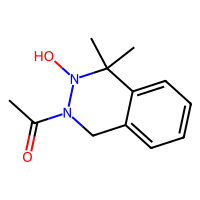
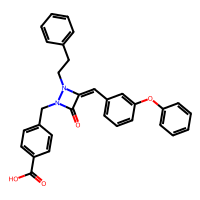
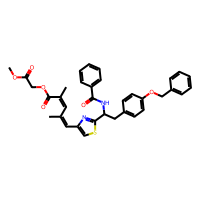
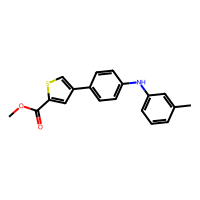

In [8]:
df["molecular_weight"] = df["ROMol"].apply(Descriptors.ExactMolWt)
df["n_hba"] = df["ROMol"].apply(Descriptors.NumHAcceptors)
df["n_hbd"] = df["ROMol"].apply(Descriptors.NumHDonors)
df["logp"] = df["ROMol"].apply(Descriptors.MolLogP)
# NBVAL_CHECK_OUTPUT
df

In [9]:
# Define Lipinski Rule
ro5_properties = {
    "molecular_weight": (500, "molecular weight (Da)"),
    "n_hba": (10, "# HBA"),
    "n_hbd": (5, "# HBD"),
    "logp": (5, "logP"),
}

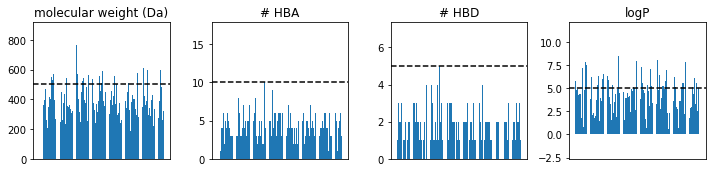

In [11]:
# Start 1x4 plot frame
fig, axes = plt.subplots(figsize=(10, 2.5), nrows=1, ncols=4)
x = np.arange(1, len(df) + 1)

# Create subplots
for index, (key, (threshold, title)) in enumerate(ro5_properties.items()):
    axes[index].bar(df.index,df[key])
    axes[index].axhline(y=threshold, color="black", linestyle="dashed")
    axes[index].set_title(title)
    axes[index].set_xticks([])

# Fit subplots and legend into figure
plt.tight_layout()
plt.show()

Once again the dataset mostly violates the LogP and molecular weight rule of the lipinski rule

In [14]:
def calculate_ro5_properties(smiles):
    """
    Test if input molecule (SMILES) fulfills Lipinski's rule of five.

    Parameters
    ----------
    smiles : str
        SMILES for a molecule.

    Returns
    -------
    pandas.Series
        Molecular weight, number of hydrogen bond acceptors/donor and logP value
        and Lipinski's rule of five compliance for input molecule.
    """
    # RDKit molecule from SMILES
    molecule = Chem.MolFromSmiles(smiles)
    # Calculate Ro5-relevant chemical properties
    molecular_weight = Descriptors.ExactMolWt(molecule)
    n_hba = Descriptors.NumHAcceptors(molecule)
    n_hbd = Descriptors.NumHDonors(molecule)
    logp = Descriptors.MolLogP(molecule)
    # Check if Ro5 conditions fulfilled
    conditions = [molecular_weight <= 500, n_hba <= 10, n_hbd <= 5, logp <= 5]
    ro5_fulfilled = sum(conditions) >= 3
    # Return True if no more than one out of four conditions is violated
    return pd.Series(
        [molecular_weight, n_hba, n_hbd, logp, ro5_fulfilled],
        index=["molecular_weight", "n_hba", "n_hbd", "logp", "ro5_fulfilled"],
    )

In [15]:
# This takes a couple of seconds
ro5_properties = df["SMILES"].apply(calculate_ro5_properties)
df = pd.concat([df, ro5_properties], axis=1)
df = df[df['ro5_fulfilled']]
df

,SMILES,ROMol,molecular_weight,n_hba,n_hbd,logp,molecular_weight,n_hba,n_hbd,logp,ro5_fulfilled
1772,O=C(c1ccc(O)cc1)N1CCC(Cc2ccccc2)CC1,<rdkit.Chem.rdchem.Mol object at 0x7faa5f57fdc0>,295.157229,2,1,3.48710,295.157229,2,1,3.48710,True
1774,C=C(CCC)C1=CC2=C3C(=O)C(=O)C(=Cc4ccccc4)C2=C(O...,<rdkit.Chem.rdchem.Mol object at 0x7faa5f57f9a0>,470.209324,5,2,5.62670,470.209324,5,2,5.62670,True
1775,COC(=O)C1C(C)=NC(=O)NC1c1ccc(C)cc1,<rdkit.Chem.rdchem.Mol object at 0x7faa5f57f940>,260.116092,3,1,2.00942,260.116092,3,1,2.00942,True
1776,O=C(O)C(=O)Nc1ccc(OCc2c(F)cccc2Br)cc1,<rdkit.Chem.rdchem.Mol object at 0x7faa5f57f8e0>,366.985548,3,2,3.19030,366.985548,3,2,3.19030,True
1777,O=C(O)COc1c(C(=O)O)sc(-c2ccccc2)c1Br,<rdkit.Chem.rdchem.Mol object at 0x7faa5f57f880>,355.935406,4,2,3.33920,355.935406,4,2,3.33920,True
...,...,...,...,...,...,...,...,...,...,...,...
2765,O=C(O)COc1ccc(-c2ccc(NS(=O)(=O)c3ccc(Cl)cc3NC(...,<rdkit.Chem.rdchem.Mol object at 0x7faa5f5ef340>,504.039414,6,4,3.29430,504.039414,6,4,3.29430,True
2767,O=C(c1cccc(Cl)c1)N1CCCc2cc(C(O)CN3CCCCC3)ccc21,<rdkit.Chem.rdchem.Mol object at 0x7faa5f5ef400>,398.176106,3,1,4.45230,398.176106,3,1,4.45230,True
2768,CC(=O)N1Cc2ccccc2C(C)(C)N1O,<rdkit.Chem.rdchem.Mol object at 0x7faa5f5ef460>,220.121178,3,1,1.89000,220.121178,3,1,1.89000,True
2769,O=C(O)c1ccc(CN2C(=O)C(=Cc3cccc(Oc4ccccc4)c3)N2...,<rdkit.Chem.rdchem.Mol object at 0x7faa5f5ef4c0>,490.189257,4,1,6.02010,490.189257,4,1,6.02010,True


87.2% of the generated molecules adhere to the Lipinski rule, these will now be filtered on PAINS and unwanted substructures